2025-05-08 17:37:08.911082: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746715028.941282   34782 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746715028.951487   34782 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746715028.970930   34782 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746715028.970968   34782 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746715028.970972   34782 computation_placer.cc:177] computation placer alr

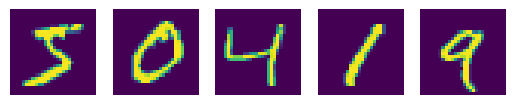

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_trainclass), (x_test, y_testclass) = mnist.load_data()

def plotn(n,x):
    fig,ax = plt.subplots(1,n)
    for i,z in enumerate(x[0:n]):
        ax[i].imshow(z.reshape(28,28) if z.size==(28*28) else z.reshape(14,14) if z.size==14*14 else z)
        ax[i].axis('off')
    plt.show()

plotn(5,x_train)

In [3]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy,mse

input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

encoder = Model(input_img, encoded)

input_rep = Input(shape=(4,4,8))

x = Conv2D(8, (3, 3), activation='relu', padding='same')(input_rep)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


decoder = Model(input_rep,decoded)

autoencoder = Model(input_img, decoder(encoder(input_img)))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

2025-05-08 17:37:13.990662: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:

autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 123ms/step - loss: 0.3653 - val_loss: 0.1536
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - loss: 0.1467 - val_loss: 0.1298
Epoch 3/25
412/469 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 0.1285

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


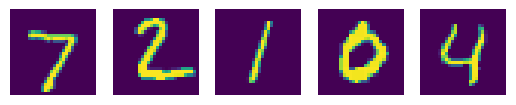

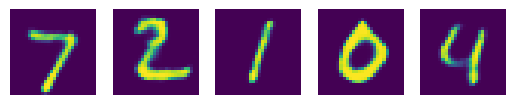

In [ ]:

y_test = autoencoder.predict(x_test[0:5])
plotn(5,x_test)
plotn(5,y_test)

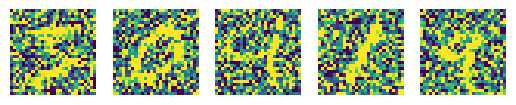

In [ ]:
def noisify(data):
  return np.clip(data+np.random.normal(loc=0.5,scale=0.5,size=data.shape),0.,1.)

x_train_noise = noisify(x_train)
x_test_noise = noisify(x_test)

plotn(5,x_train_noise)
     

In [ ]:


autoencoder.fit(x_train_noise, x_train,
                epochs=25,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noise, x_test))

2025-05-08 16:39:48.446579: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/25
  1/469 ━━━━━━━━━━━━━━━━━━━━ 1:10 151ms/step - loss: 0.8414

2025-05-08 16:39:48.788402: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 119ms/step - loss: 0.2696 - val_loss: 0.1660
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 108ms/step - loss: 0.1632 - val_loss: 0.1530
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 93ms/step - loss: 0.1525 - val_loss: 0.1473
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - loss: 0.1475 - val_loss: 0.1462
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 91ms/step - loss: 0.1443 - val_loss: 0.1408
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 91ms/step - loss: 0.1416 - val_loss: 0.1394
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - loss: 0.1395 - val_loss: 0.1375
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - loss: 0.1376 - val_loss: 0.1355
Epoch 9/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - loss: 0.1362 - val_loss: 0.1339
Epoch 10/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - loss: 0.1351 - val_loss: 0.1344
Epoch 11/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - loss: 0.1339 - val_loss: 0.1320
Epoch 12/25
469/469 ━━━━━━━━━━━━━━━━━━━

In [ ]:
y_test = autoencoder.predict(x_test_noise[0:5])
plotn(5,x_test_noise)
plotn(5,y_test)

2025-05-08 17:08:00.897194: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


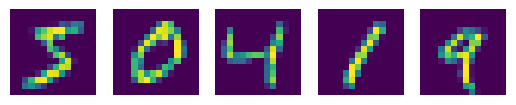

In [ ]:

x_train_lr = tf.keras.layers.AveragePooling2D(pool_size=2)(x_train).numpy()
x_test_lr = tf.keras.layers.AveragePooling2D(pool_size=2)(x_test).numpy()
plotn(5,x_train_lr)

In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy,mse

input_img = Input(shape=(14, 14, 1))

x = Conv2D(16, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

encoder = Model(input_img,encoded)

input_rep = Input(shape=(4,4,8))

x = Conv2D(8, (3,3), activation='relu', padding='same')(input_rep)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation='relu')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

decoder = Model(input_rep,decoded)

autoencoder = Model(input_img, decoder(encoder(input_img)))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
     

In [ ]:
autoencoder.fit(x_train_lr, x_train,
                epochs=25,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_lr, x_test))

Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 75ms/step - loss: 0.3341 - val_loss: 0.1541
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - loss: 0.1501 - val_loss: 0.1372
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - loss: 0.1359 - val_loss: 0.1276
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 79ms/step - loss: 0.1267 - val_loss: 0.1214
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 88ms/step - loss: 0.1207 - val_loss: 0.1168
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - loss: 0.1170 - val_loss: 0.1140
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 84ms/step - loss: 0.1143 - val_loss: 0.1122
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 83ms/step - loss: 0.1122 - val_loss: 0.1097
Epoch 9/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 98ms/step - loss: 0.1106 - val_loss: 0.1087
Epoch 10/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - loss: 0.1091 - val_loss: 0.1069
Epoch 11/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 91ms/step - loss: 0.1076 - val_loss: 0.1057
Epoch 12/25
469/469 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


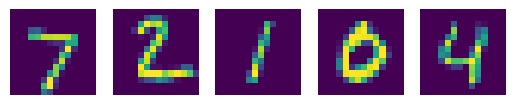

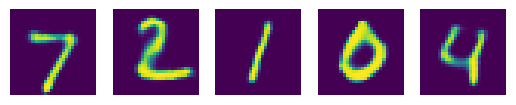

In [ ]:
y_test_lr = autoencoder.predict(x_test_lr[0:5])
plotn(5,x_test_lr)
plotn(5,y_test_lr)

In [ ]:
intermediate_dim = 512
latent_dim = 2
batch_size = 128

inputs = Input(shape=(784,))
h = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)


@tf.function
def sampling(args):
    z_mean, z_log_sigma = args
    bs = tf.shape(z_mean)[0]
    epsilon = tf.random.normal(shape=(bs, latent_dim))
    return z_mean + tf.exp(z_log_sigma) * epsilon

z = Lambda(sampling)([z_mean, z_log_sigma])

encoder = Model(inputs, [z_mean, z_log_sigma, z])

latent_inputs = Input(shape=(latent_dim,))
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(784, activation='sigmoid')(x)

decoder = Model(latent_inputs, outputs)

final_outputs = decoder(encoder(inputs)[2])

vae = Model(inputs, final_outputs)


NameError: name 'Input' is not defined

In [ ]:
@tf.function
def vae_loss(x1,x2):
  reconstruction_loss = mse(x1,x2)*784
  tmp = 1 + z_log_sigma - tf.square(z_mean) - tf.exp(z_log_sigma)
  kl_loss = -0.5*tf.reduce_sum(tmp, axis=-1)
  return tf.convert_to_tensor(tf.reduce_mean(reconstruction_loss + kl_loss))

vae.compile(optimizer='rmsprop', loss=vae_loss)

In [ ]:
x_train_flat = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flat = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train_flat, x_train_flat,
        shuffle=True,
        epochs=25,
        batch_size=batch_size,
        validation_data=(x_test_flat, x_test_flat))

Epoch 1/25


RuntimeError: `tf.data.Dataset` only supports Python-style iteration in eager mode or within tf.function.

In [ ]:
y_test = vae.predict(x_test_flat[0:5])
plotn(5,x_test_flat)
plotn(5,y_test)